In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
def obtener_tablas_mysql(host, usuario, contraseña, base_datos):
    # Crear la cadena de conexión a la base de datos
    cadena_conexion = f"mysql+pymysql://{usuario}:{contraseña}@{host}/{base_datos}"

    # Crear el motor de conexión a la base de datos
    motor = create_engine(cadena_conexion)

    # Crear el objeto Inspector
    inspector = inspect(motor)

    # Obtener los nombres de todas las tablas en la base de datos
    nombres_tablas = inspector.get_table_names()

    # Almacenar los DataFrames correspondientes a cada tabla en un diccionario
    diccionario_tablas = {}
    for nombre_tabla in nombres_tablas:
        query = f"SELECT * FROM {nombre_tabla}"
        df = pd.read_sql(query, con=motor)
        diccionario_tablas[nombre_tabla] = df

    return diccionario_tablas



In [3]:
# definimos las variables con los datos de mysql
host = "localhost"
usuario = "root"
contraseña = "joshua"
base_datos = "bikes_bd"

diccionario_tablas = obtener_tablas_mysql(host, usuario, contraseña, base_datos)

# Imprimir las primeras filas de cada DataFrame
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Tabla: {nombre_tabla}")
    print(df.head())
    print("\n")

Tabla: abr23
            ride_id  rideable_type          started_at            ended_at  \
0  5B6500E1E58655C0   classic_bike 2023-04-10 17:34:35 2023-04-10 18:02:36   
1  AA65D25D69AF771F   classic_bike 2023-04-12 12:29:46 2023-04-12 12:54:00   
2  079FB2C196414482  electric_bike 2023-04-13 17:39:23 2023-04-13 17:40:57   
3  599623864C871207   classic_bike 2023-04-29 20:57:10 2023-04-29 20:57:13   
4  63ECC8A13D11A76A   classic_bike 2023-04-20 17:03:11 2023-04-20 17:24:58   

             start_station_name start_station_id  \
0           Avenue O & 134th St            20214   
1   Cottage Grove Ave & 51st St     TA1309000067   
2          Morgan Ave & 14th Pl     TA1306000002   
3   Cottage Grove Ave & 51st St     TA1309000067   
4  California Ave & Division St            13256   

                 end_station_name end_station_id  start_lat  start_lng  \
0             Avenue O & 134th St          20214  41.651868 -87.539671   
1     Cottage Grove Ave & 51st St   TA1309000067  41.8030

In [4]:
# Iterar sobre cada tabla en el diccionario y llamar al método info()
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Información de la tabla: {nombre_tabla}")
    print(df.info())
    print("\n")


Información de la tabla: abr23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324197 entries, 0 to 324196
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             324197 non-null  object         
 1   rideable_type       324197 non-null  object         
 2   started_at          324197 non-null  datetime64[ns] 
 3   ended_at            324197 non-null  datetime64[ns] 
 4   start_station_name  324197 non-null  object         
 5   start_station_id    324197 non-null  object         
 6   end_station_name    324197 non-null  object         
 7   end_station_id      324197 non-null  object         
 8   start_lat           324197 non-null  float64        
 9   start_lng           324197 non-null  float64        
 10  end_lat             324197 non-null  float64        
 11  end_lng             324197 non-null  float64        
 12  member_casual       324197 non-null  obje

Revisando la informacion de cada una de las tablas, se encuentra que hay que modificar los Dtypes de las columnas para poder realizar un analisis correcto de cada una de ellas 

In [5]:
# Definir los nuevos tipos de datos deseados para cada tabla y cada columna
nuevos_tipos_de_datos = {
    'feb23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'mar23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'abr23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'may23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'jun23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'jul23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'ago23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'sep23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'oct23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'nov23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'dic23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'ene24': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    
}

# Iterar sobre cada tabla en el diccionario y cambiar los tipos de datos de las columnas
for nombre_tabla, df in diccionario_tablas.items():
    if nombre_tabla in nuevos_tipos_de_datos:
        tipos_de_datos_por_columna = nuevos_tipos_de_datos[nombre_tabla]
        for columna, nuevo_tipo in tipos_de_datos_por_columna.items():
            df[columna] = df[columna].astype(nuevo_tipo)

# Verificar los cambios
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Tabla: {nombre_tabla}")
    print(df.dtypes)
    print("\n")

Tabla: abr23
ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id             category
end_station_name             category
end_station_id               category
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
ride_time             timedelta64[ns]
distance_km                   float64
dtype: object


Tabla: ago23
ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id             category
end_station_name             category
end_station_id               category
start_lat                     float64
start_lng                     float64
end_lat 

In [6]:
# obtenemos el resumen estadistico de cada una de las tablas 
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Información de la tabla: {nombre_tabla}")
    print(df.describe())
    print("\n")

Información de la tabla: abr23


                          started_at                       ended_at  \
count                         324197                         324197   
mean   2023-04-16 03:13:42.423390464  2023-04-16 03:29:02.133427712   
min              2023-04-01 00:00:02            2023-04-01 00:03:10   
25%              2023-04-10 11:34:36            2023-04-10 11:51:30   
50%              2023-04-15 05:45:10            2023-04-15 06:24:50   
75%              2023-04-22 07:13:15            2023-04-22 07:27:47   
max              2023-04-30 23:58:48            2023-05-01 08:06:56   
std                              NaN                            NaN   

           start_lat      start_lng        end_lat        end_lng  \
count  324197.000000  324197.000000  324197.000000  324197.000000   
mean       41.900372     -87.644843      41.900953     -87.645155   
min        41.648501     -87.830000      41.648501     -87.830000   
25%        41.879644     -87.658416      41.880330     -87.658617   
50%        41.8

In [7]:
# calculamos el promedio de km recorridos en cada mes 
for nombre_tabla, df in diccionario_tablas.items():
    print(f"promedio de km recorridos en: {nombre_tabla}")
    print(df['distance_km'].mean())
    print("\n")

promedio de km recorridos en: abr23
2.0244976178713205


promedio de km recorridos en: ago23
2.1630735086335315


promedio de km recorridos en: dic23
1.808969744591437


promedio de km recorridos en: ene24
1.6751146693780419


promedio de km recorridos en: feb23
1.7668939697633887


promedio de km recorridos en: jul23
2.179968701014933


promedio de km recorridos en: jun23
2.237503937601762


promedio de km recorridos en: mar23
1.8072705158018638


promedio de km recorridos en: may23
2.1581250187554186


promedio de km recorridos en: nov23
1.8909767888130544


promedio de km recorridos en: oct23
1.9891443777307862


promedio de km recorridos en: sep23
2.1124554311964143




In [8]:
# calculamos el numero de personas que estan dentro de los outliers para un mejor analisis
for nombre_tabla, df in diccionario_tablas.items():
    # Calcular los cuartiles
    Q1 = df['distance_km'].quantile(0.25).round(2)
    Q3 = df['distance_km'].quantile(0.75).round(2)

    # Calcular las personas que viajaron más o menos del percentil 25 y 75
    otl_max = (df['distance_km'] >= Q3).sum()
    otl_min = (df['distance_km'] < Q1).sum()

    print(f"Tabla: {nombre_tabla}")
    print(f"{otl_max} personas que viajaron más de {Q3} km")
    print(f"{otl_min} personas que viajaron menos de {Q1} km")
    print("\n")

Tabla: abr23
80988 personas que viajaron más de 2.63 km
81312 personas que viajaron menos de 0.85 km


Tabla: ago23
145978 personas que viajaron más de 2.84 km
146087 personas que viajaron menos de 0.9 km


Tabla: dic23
41604 personas que viajaron más de 2.3 km
42175 personas que viajaron menos de 0.82 km


Tabla: ene24
28386 personas que viajaron más de 2.08 km
28176 personas que viajaron menos de 0.76 km




Tabla: feb23
37294 personas que viajaron más de 2.22 km
37065 personas que viajaron menos de 0.77 km


Tabla: jul23
143155 personas que viajaron más de 2.88 km
143535 personas que viajaron menos de 0.91 km


Tabla: jun23
133895 personas que viajaron más de 2.9 km
133317 personas que viajaron menos de 0.93 km


Tabla: mar23
50044 personas que viajaron más de 2.3 km
49677 personas que viajaron menos de 0.8 km


Tabla: may23
115512 personas que viajaron más de 2.86 km
115292 personas que viajaron menos de 0.89 km


Tabla: nov23
68570 personas que viajaron más de 2.4 km
68305 personas que viajaron menos de 0.83 km


Tabla: oct23
101113 personas que viajaron más de 2.55 km
101795 personas que viajaron menos de 0.86 km


Tabla: sep23
126525 personas que viajaron más de 2.76 km
126028 personas que viajaron menos de 0.88 km




In [10]:
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

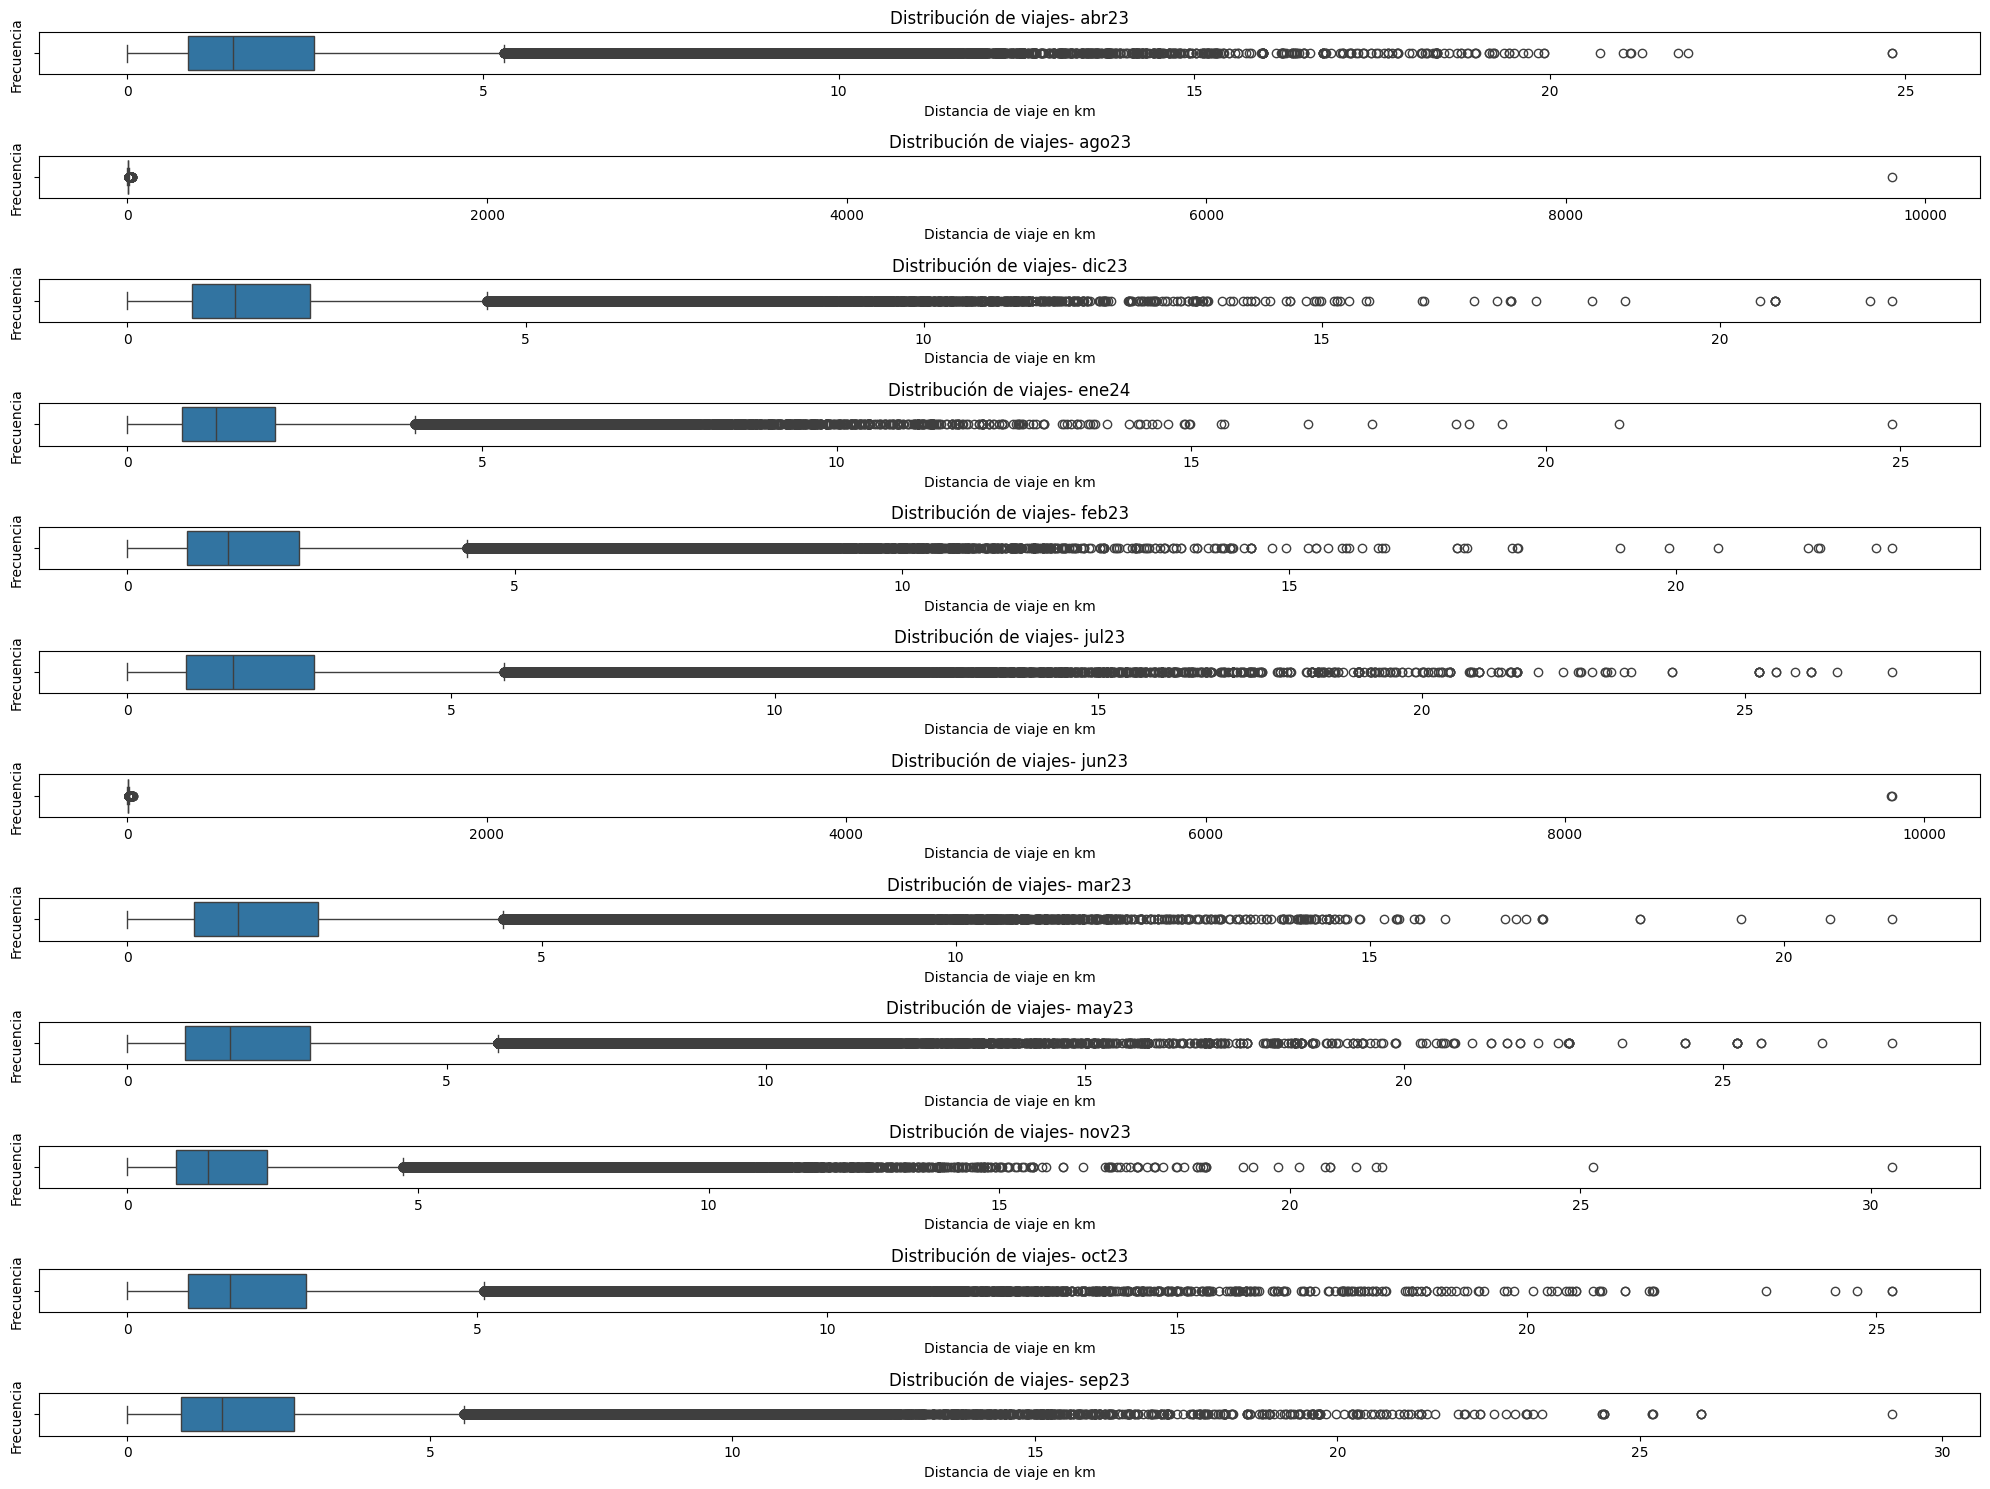

In [21]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico con outliers
    sns.boxplot(x=df['distance_km'], ax=axs[i])
    axs[i].set_title(f'Distribución de viajes- {nombre_tabla}')
    axs[i].set_xlabel('Distancia de viaje en km')
    axs[i].set_ylabel('Frecuencia')

# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

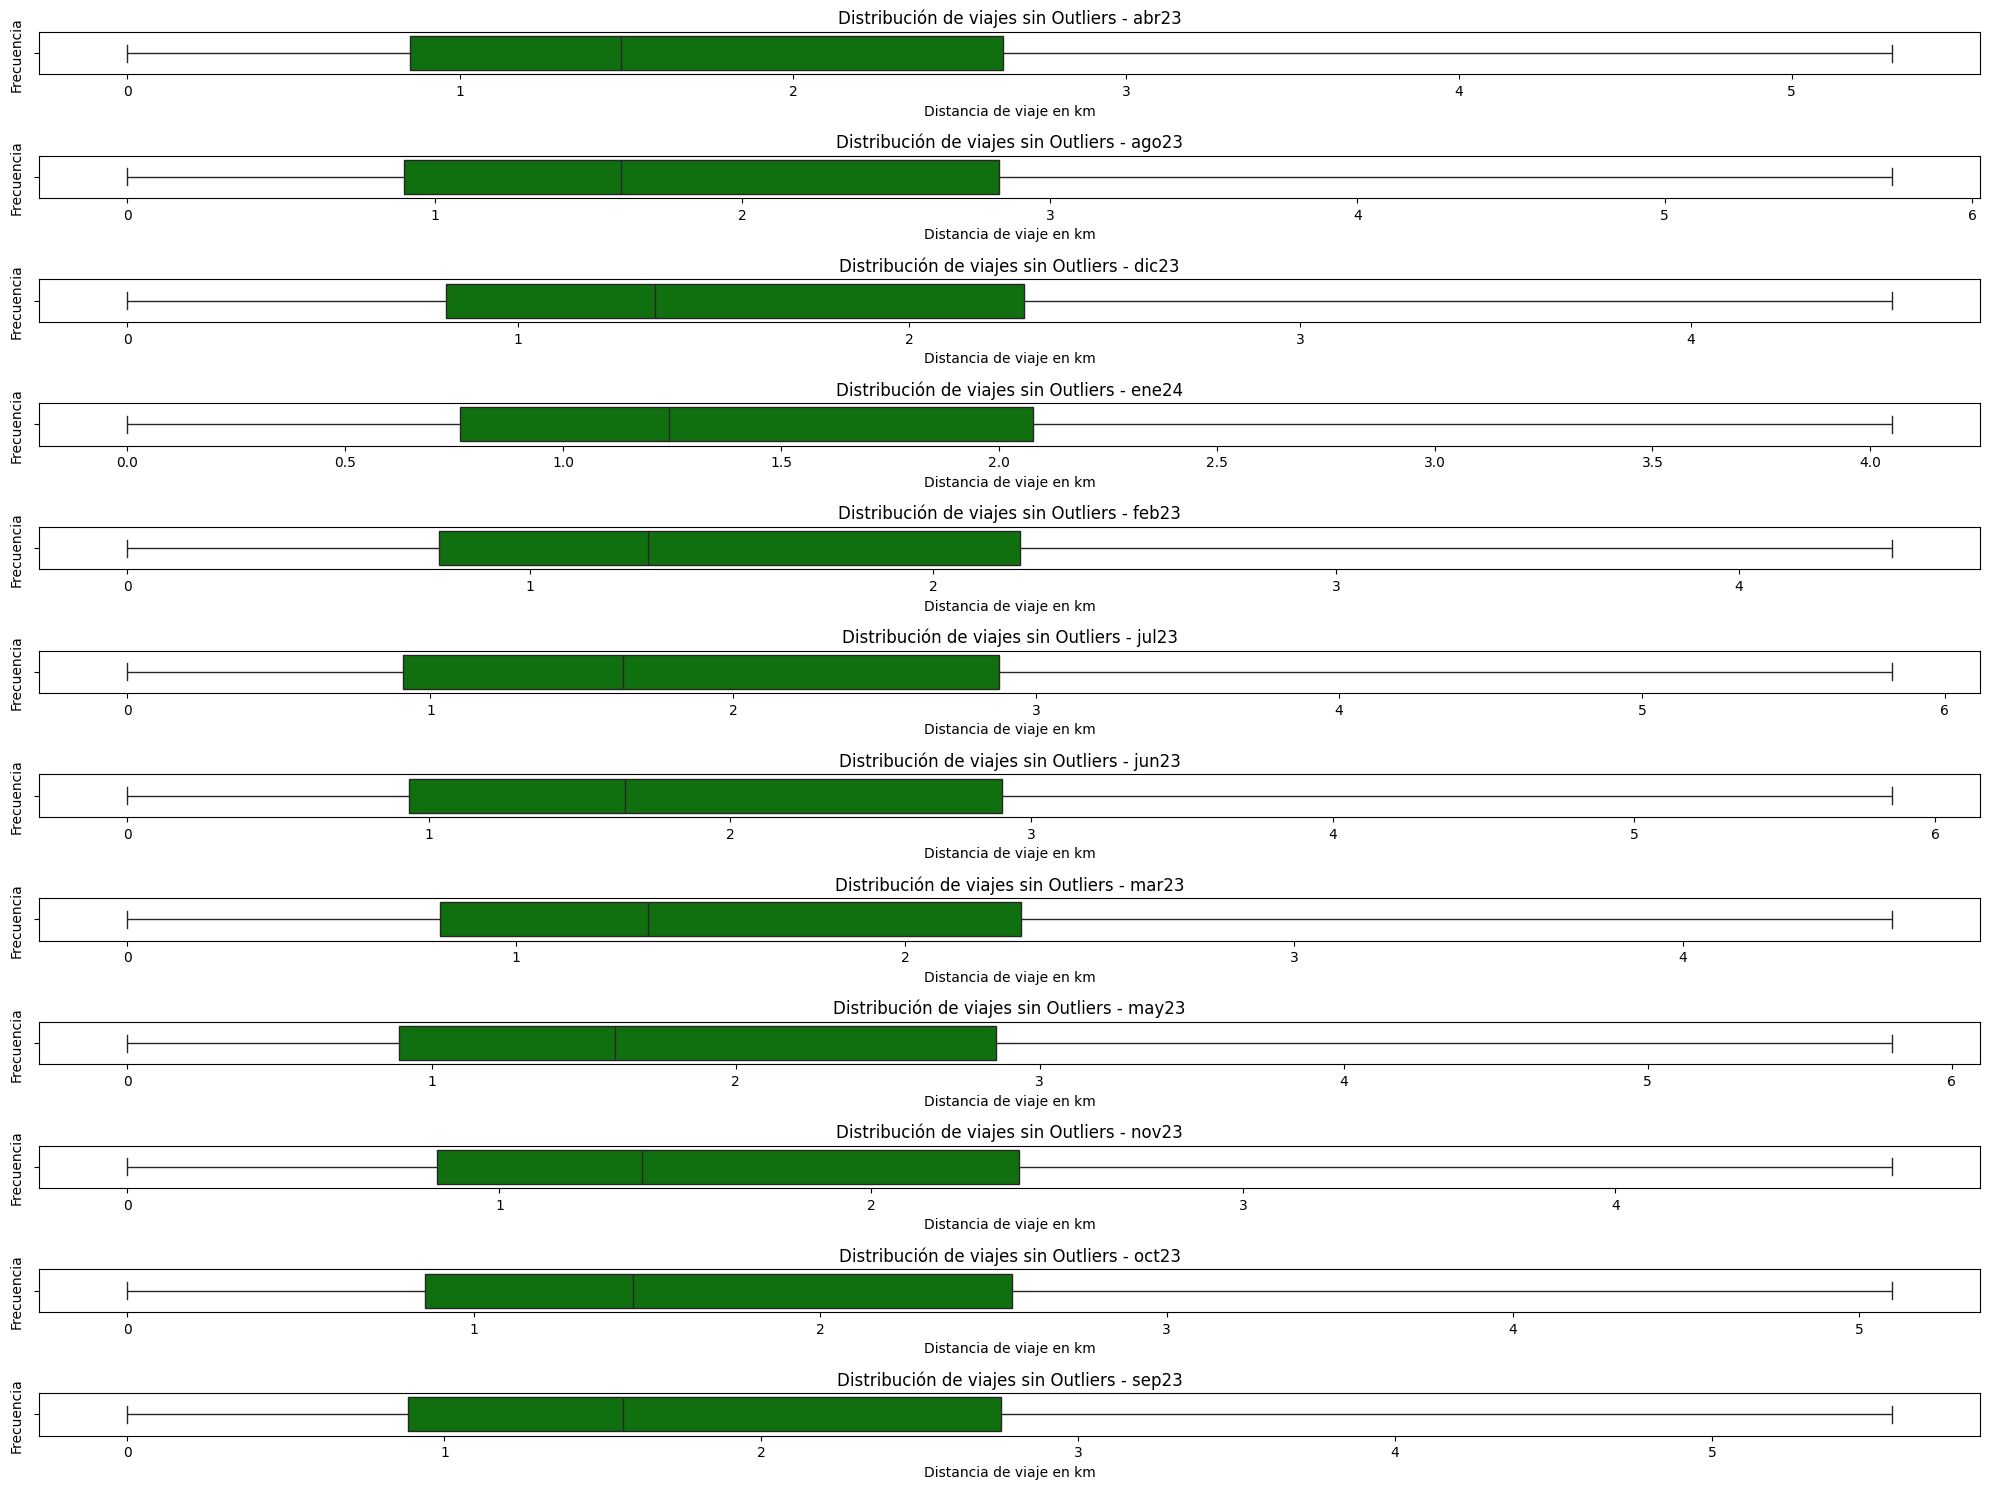

In [20]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico con outliers
    sns.boxplot(x=df['distance_km'], showfliers=False, ax=axs[i],color='green')
    axs[i].set_title(f'Distribución de viajes sin Outliers - {nombre_tabla}')
    axs[i].set_xlabel('Distancia de viaje en km')
    axs[i].set_ylabel('Frecuencia')

# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

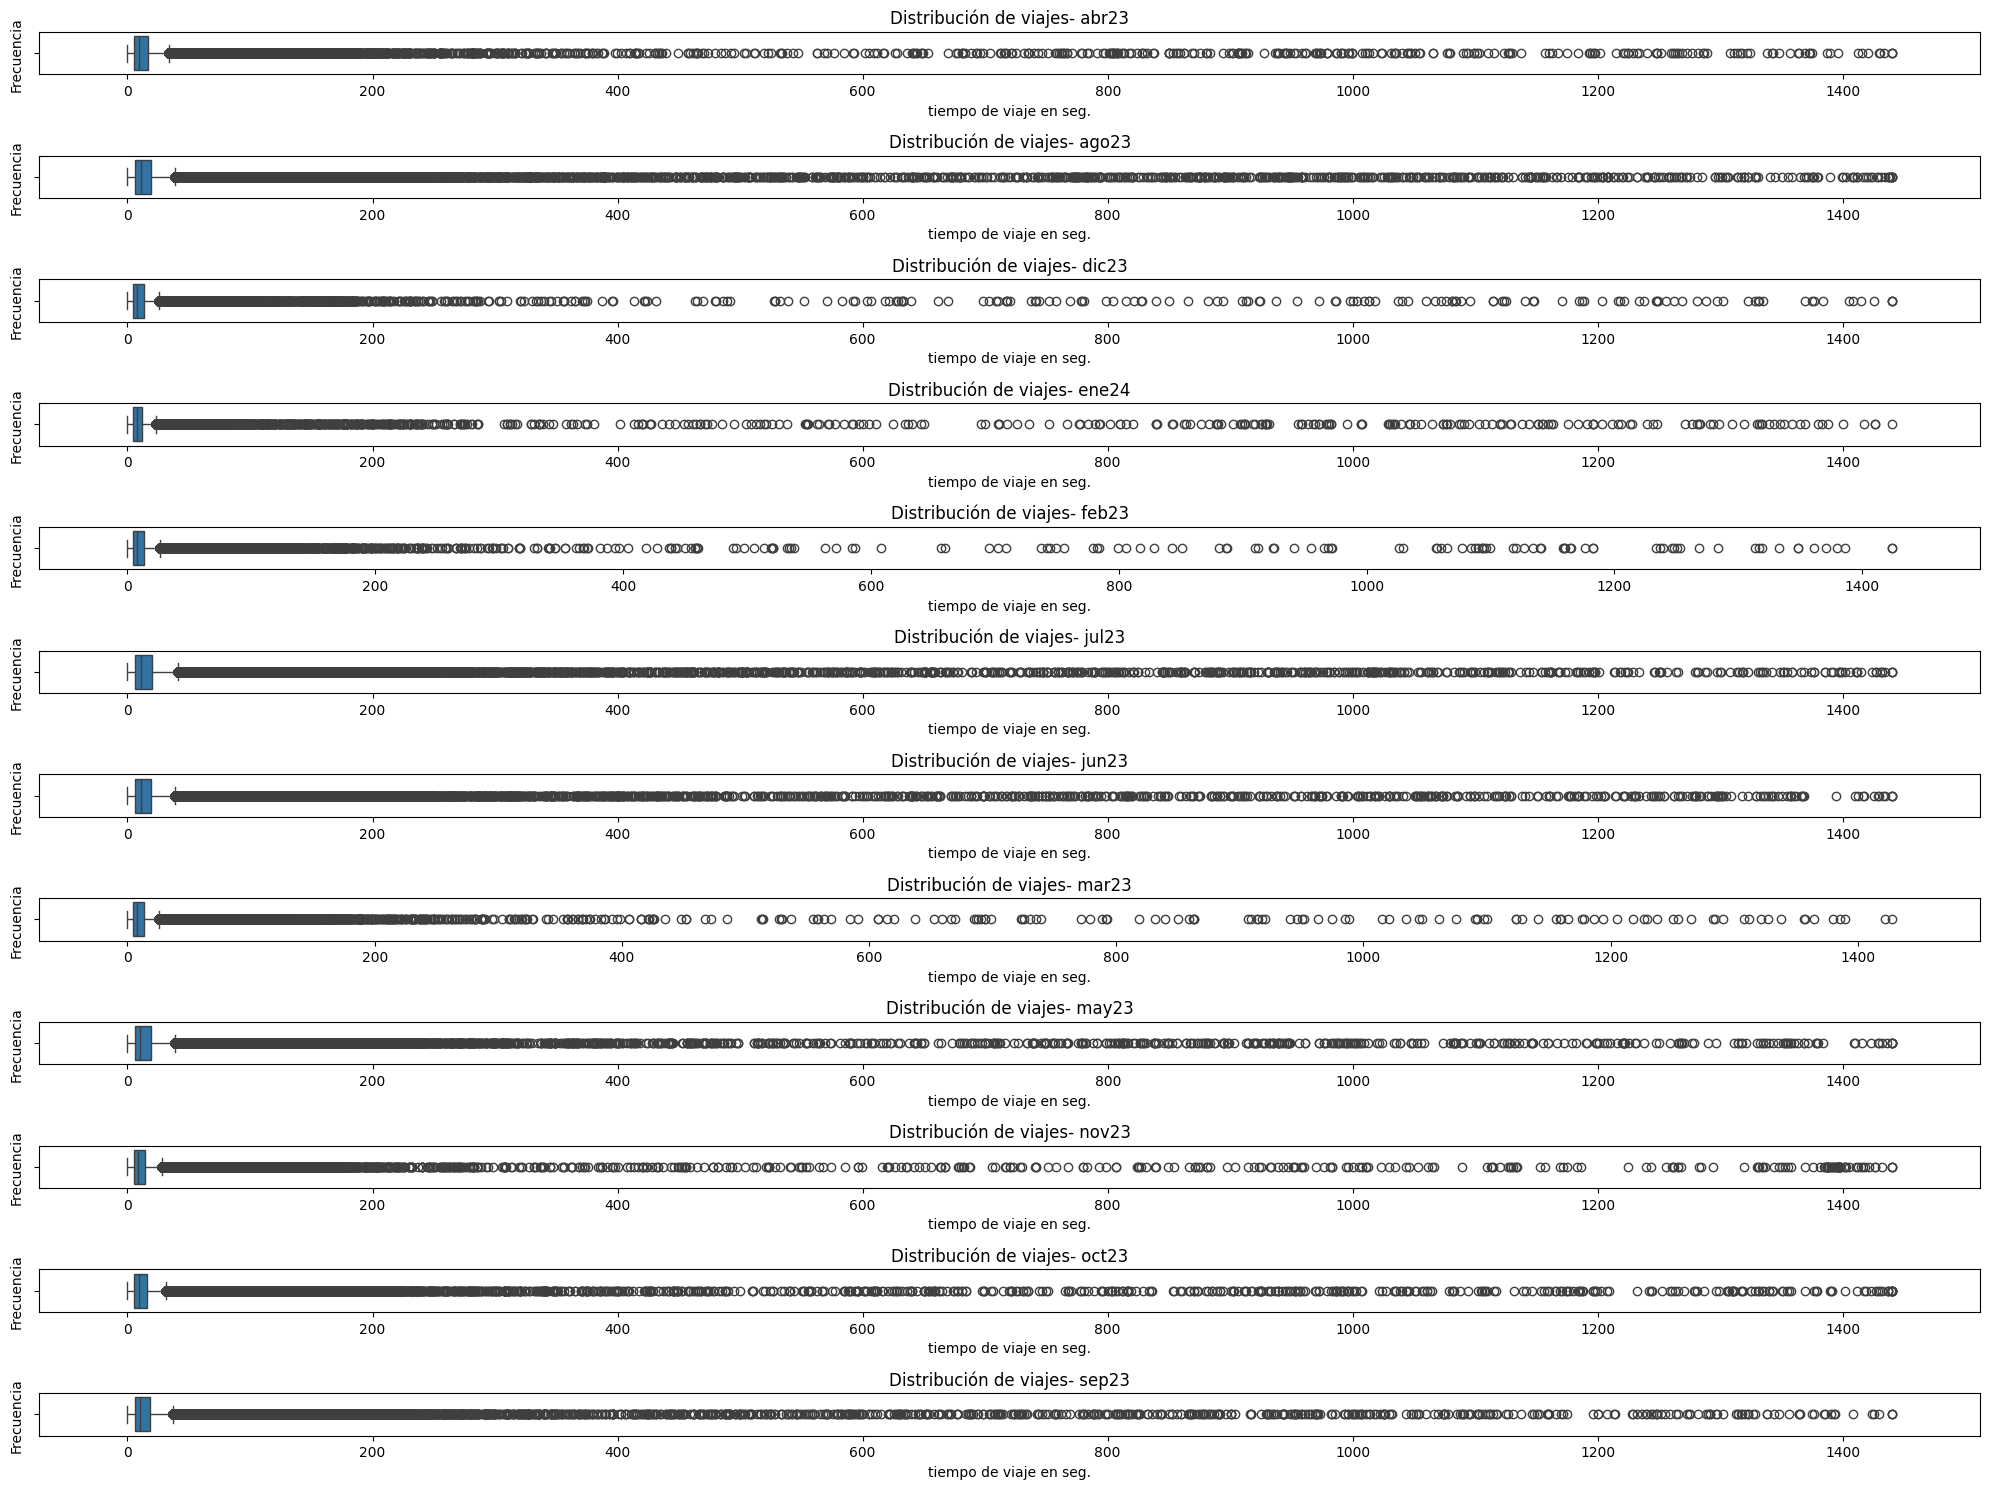

In [35]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico con outliers
    sns.boxplot(x=df['ride_time'].dt.total_seconds() / 60, ax=axs[i])
    axs[i].set_title(f'Distribución de viajes- {nombre_tabla}')
    axs[i].set_xlabel('tiempo de viaje en seg.')
    axs[i].set_ylabel('Frecuencia')
    # Establecer límites del eje x
    max_tiempo = df['ride_time'].dt.total_seconds().max()/60
    axs[i].set_xlim(0, max_tiempo)
# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

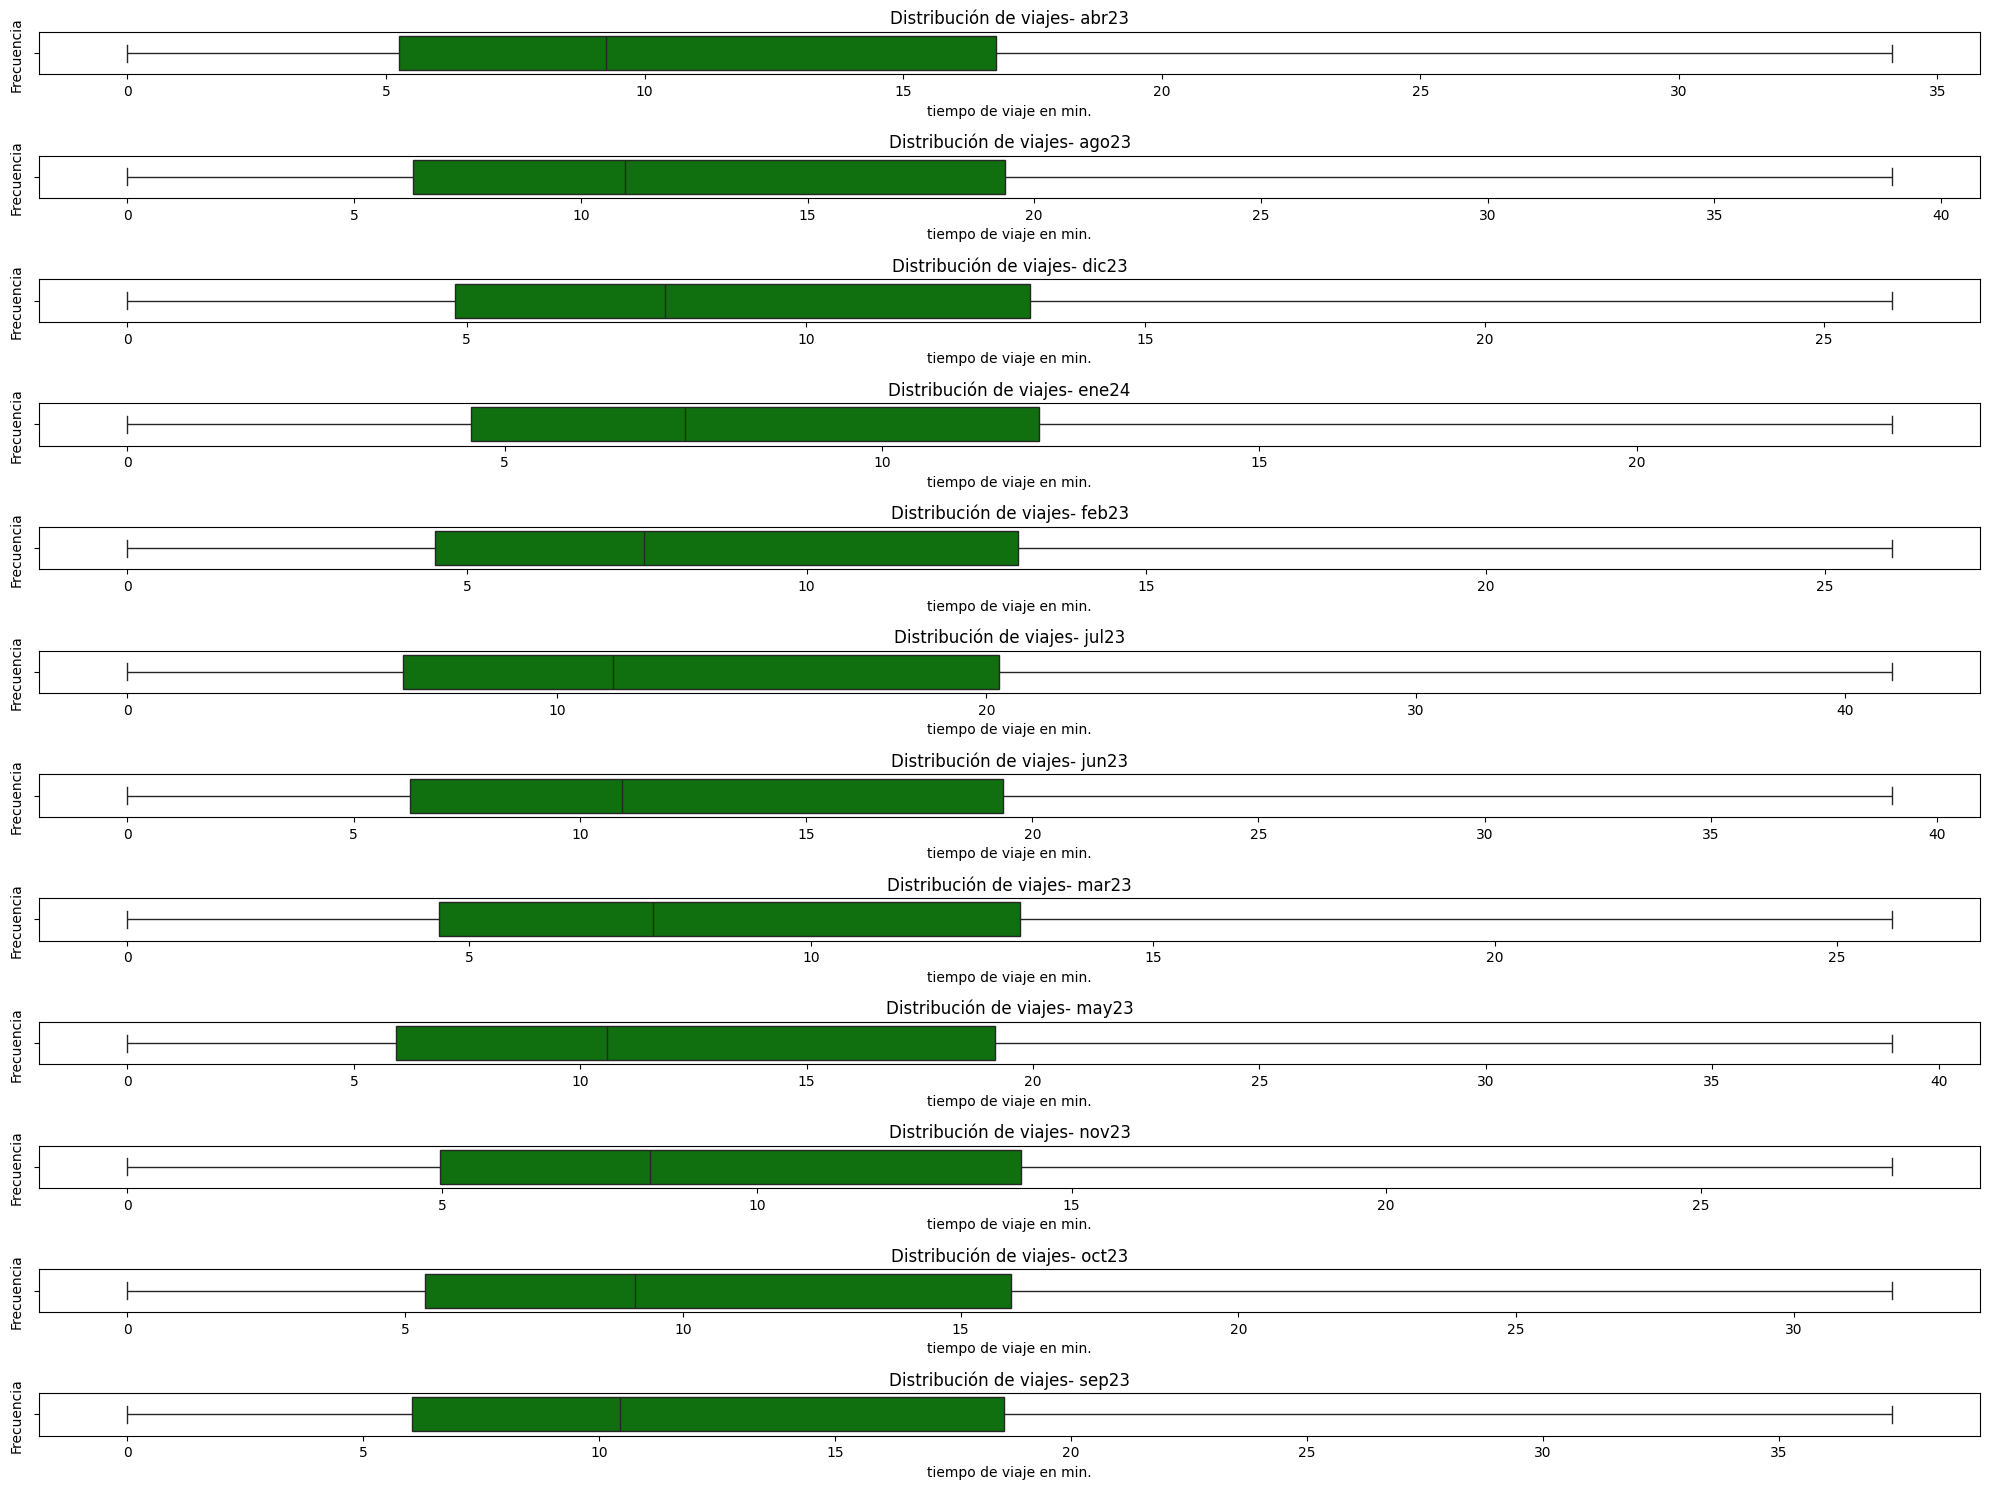

In [36]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico sin outliers
    sns.boxplot(x=df['ride_time'].dt.total_seconds() / 60, showfliers=False, ax=axs[i],color='green')
    axs[i].set_title(f'Distribución de viajes- {nombre_tabla}')
    axs[i].set_xlabel('tiempo de viaje en min.')
    axs[i].set_ylabel('Frecuencia')
# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [25]:
# calculamos el numero de personas que estan dentro de los outliers para un mejor analisis
for nombre_tabla, df in diccionario_tablas.items():
    # Calcular el tiempo máximo y mínimo para esta tabla
    tiempo_maximo = df['ride_time'].quantile(0.75)
    tiempo_minimo = df['ride_time'].quantile(0.25)

    # Calcular las personas que viajaron más o menos del tiempo máximo y mínimo
    otl_timemax = (df['ride_time'] > tiempo_maximo).sum()
    otl_timemin = (df['ride_time'] < tiempo_minimo).sum()

    print(f"Tabla: {nombre_tabla}")
    print(f"{otl_timemax} personas que viajaron más de {tiempo_maximo} mins por viaje en: {nombre_tabla[:3]}")
    print(f"{otl_timemin} personas que viajaron menos de {tiempo_minimo} mins por viaje en: {nombre_tabla[:3]}")
    print("\n")

Tabla: abr23
81016 personas que viajaron más de 0 days 00:16:48 mins por viaje en: abr
81038 personas que viajaron menos de 0 days 00:05:15 mins por viaje en: abr


Tabla: ago23
146191 personas que viajaron más de 0 days 00:19:21 mins por viaje en: ago
146166 personas que viajaron menos de 0 days 00:06:18 mins por viaje en: ago


Tabla: dic23
41742 personas que viajaron más de 0 days 00:13:18 mins por viaje en: dic
41708 personas que viajaron menos de 0 days 00:04:50 mins por viaje en: dic


Tabla: ene24
28449 personas que viajaron más de 0 days 00:12:05 mins por viaje en: ene
28377 personas que viajaron menos de 0 days 00:04:33 mins por viaje en: ene


Tabla: feb23
37345 personas que viajaron más de 0 days 00:13:07 mins por viaje en: feb
37157 personas que viajaron menos de 0 days 00:04:32 mins por viaje en: feb


Tabla: jul23
143449 personas que viajaron más de 0 days 00:20:17 mins por viaje en: jul
143121 personas que viajaron menos de 0 days 00:06:25 mins por viaje en: jul


Tabla:

se puede observar que la columna distance_km contiene una cantidad significativa de outliers, sin embargo la media se encuentra en 1.29 km recorridos y los cuartiles .25  y .75 se encuentran .77 y 2.21 km respectivamente 

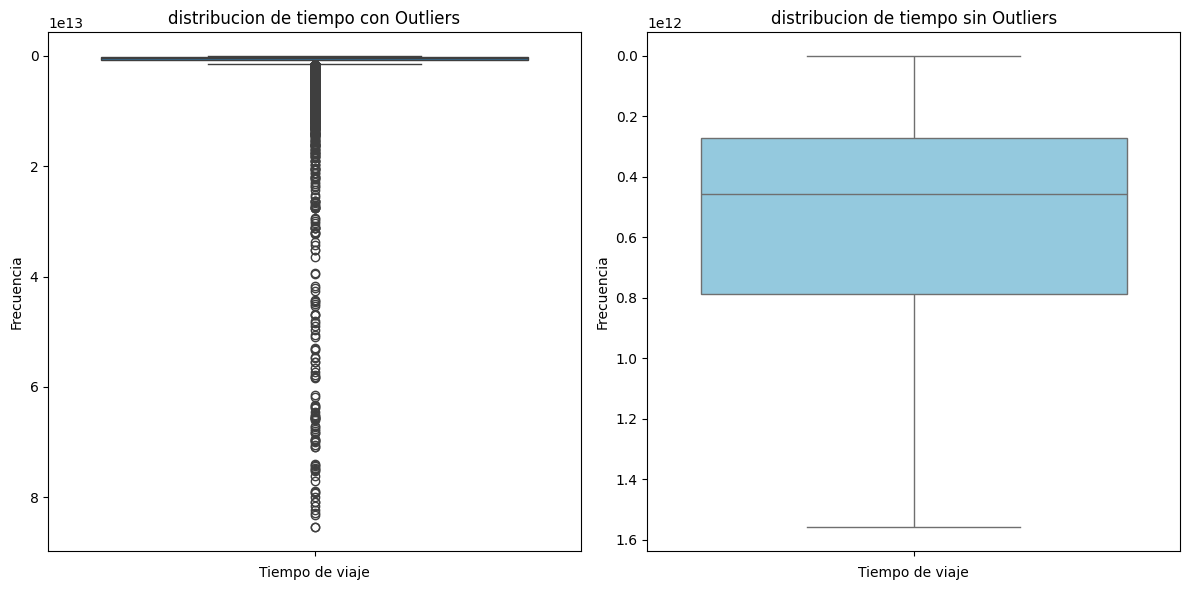

In [31]:
# creamos un boxplot sin outliers para identificar  los valores extremos
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Gráfico con outliers
sns.boxplot(feb['ride_time'], ax=axs[0])
axs[0].set_title('distribucion de tiempo con Outliers')
axs[0].set_xlabel('Tiempo de viaje')
axs[0].set_ylabel('Frecuencia')

# Gráfico sin outliers
sns.boxplot(feb['ride_time'], showfliers=False, ax=axs[1], color='skyblue')
axs[1].set_title('distribucion de tiempo sin Outliers')
axs[1].set_xlabel('Tiempo de viaje')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [26]:
# establecemos el tamaño de nuestro grafico 
plt.figure(figsize= (10 , 6))

# Crear el gráfico de barras
ax = sns.countplot(x='rideable_type', data=feb, hue='rideable_type')

plt.title('Cantidad de viajes por tipo de transporte')
plt.xlabel('tipo de bicicleta')
plt.ylabel('cantidad de viajes')

# Agregar anotaciones
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

NameError: name 'feb' is not defined

<Figure size 1000x600 with 0 Axes>

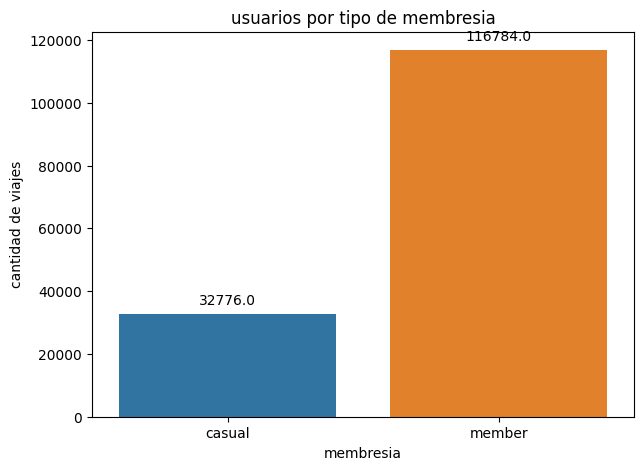

In [41]:
# establecemos el tamaño de nuestro grafico 
plt.figure(figsize= (7 , 5))

# creamos el grafico de barras
ax = sns.countplot(x='member_casual', data=feb, hue='member_casual')

plt.title('usuarios por tipo de membresia')
plt.xlabel('membresia')
plt.ylabel('cantidad de viajes')

# Agregar anotaciones
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

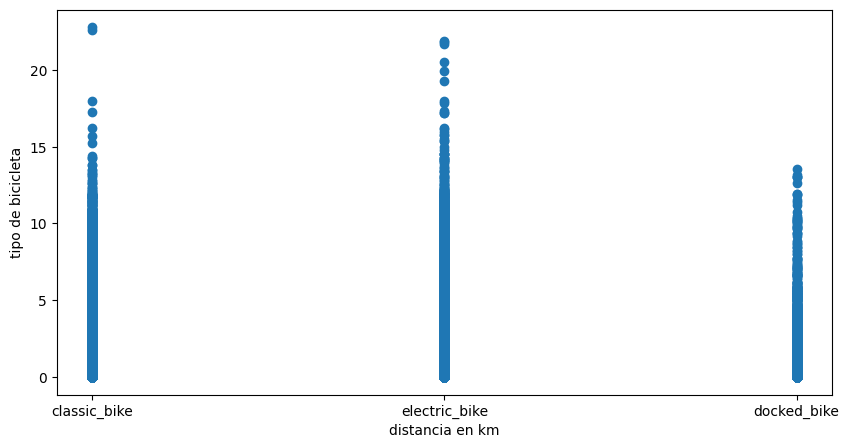

In [62]:
plt.figure(figsize=(10,5))

plt.scatter(x='rideable_type', y='distance_km', data=feb,)

plt.xlabel('distancia en km')
plt.ylabel('tipo de bicicleta')

plt.show()